In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.callbacks import EarlyStopping
from math import sqrt

In [2]:
# Get stock data from Yahoo Finance
def get_stock_data(symbol, start_date, end_date, interval):
    stock_data = yf.download(symbol, start_date, end_date, interval=interval)
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
    plt.title(f'{symbol} Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
 
    return stock_data[['Open', 'High', 'Low', 'Close', 'Volume']], stock_data.index


In [3]:
# Function to create sequences for training
def create_sequences(X, y, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

In [4]:
def plot_predictions_with_dates(dates, actual, predicted, title):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, actual, label='Actual')  
    plt.plot(dates, predicted, label='Predicted')  
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout() 
    plt.show()


In [5]:
# Define stock symbols and sequence length
symbols = ['AAPL', 'GOOGL', 'TSLA', 'AMD']
sequence_length = 10

In [6]:
# Function to evaluate model performance
def evaluate_model_performance(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R^2 Score: {r2}")


[*********************100%%**********************]  1 of 1 completed


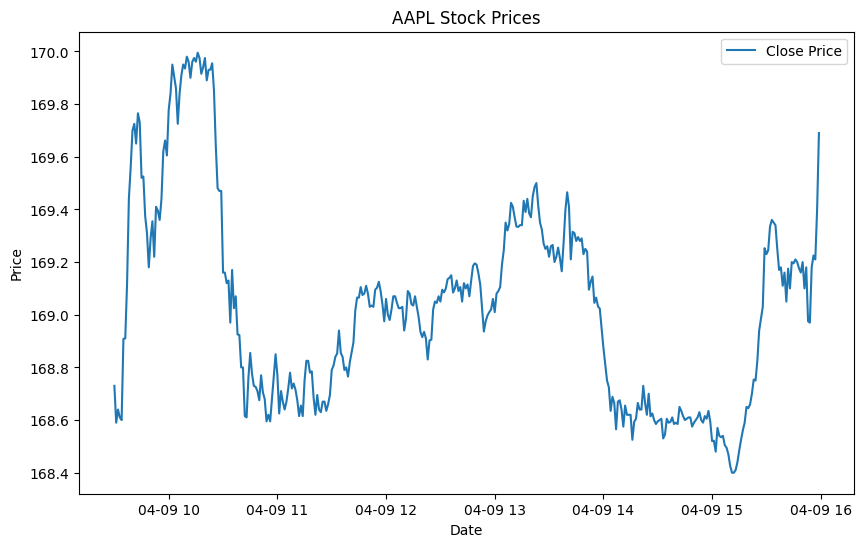



Epoch 1/10

9/9 - 3s - loss: 0.1186 - val_loss: 0.0173 - 3s/epoch - 372ms/step
Epoch 2/10
9/9 - 0s - loss: 0.0358 - val_loss: 0.0061 - 68ms/epoch - 8ms/step
Epoch 3/10
9/9 - 0s - loss: 0.0240 - val_loss: 0.0023 - 65ms/epoch - 7ms/step
Epoch 4/10
9/9 - 0s - loss: 0.0219 - val_loss: 0.0070 - 63ms/epoch - 7ms/step
Epoch 5/10
9/9 - 0s - loss: 0.0173 - val_loss: 0.0037 - 64ms/epoch - 7ms/step
Epoch 6/10
9/9 - 0s - loss: 0.0193 - val_loss: 0.0020 - 66ms/epoch - 7ms/step
Epoch 7/10
9/9 - 0s - loss: 0.0145 - val_loss: 0.0022 - 64ms/epoch - 7ms/step
Epoch 8/10
9/9 - 0s - loss: 0.0152 - val_loss: 0.0016 - 67ms/epoch - 7ms/step
Epoch 9/10
9/9 - 0s - loss: 0.0142 - val_loss: 0.0012 - 65ms/epoch - 7ms/step
Epoch 10/10
9/9 - 0s - loss: 0.0142 - val_loss: 0.0012 - 67ms/epoch - 7ms/step
3/3 [==============================] - 1s 3ms/step


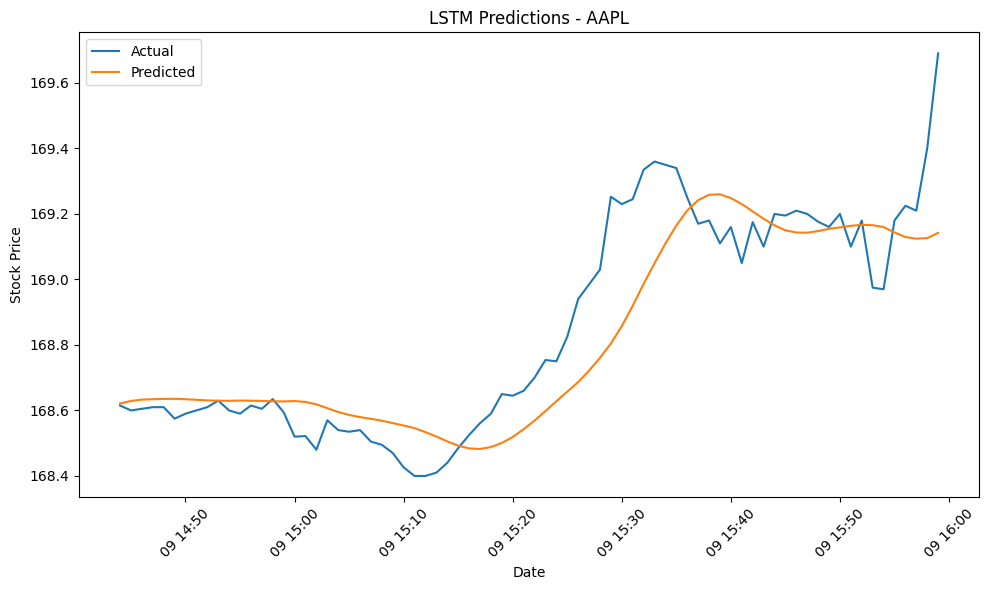

[*********************100%%**********************]  1 of 1 completed

Evaluating LSTM Performance for AAPL
Mean Squared Error (MSE): 0.02415495483498824
Root Mean Squared Error (RMSE): 0.1554186437818457
Mean Absolute Error (MAE): 0.11156664396587171
R^2 Score: 0.7768961851337004


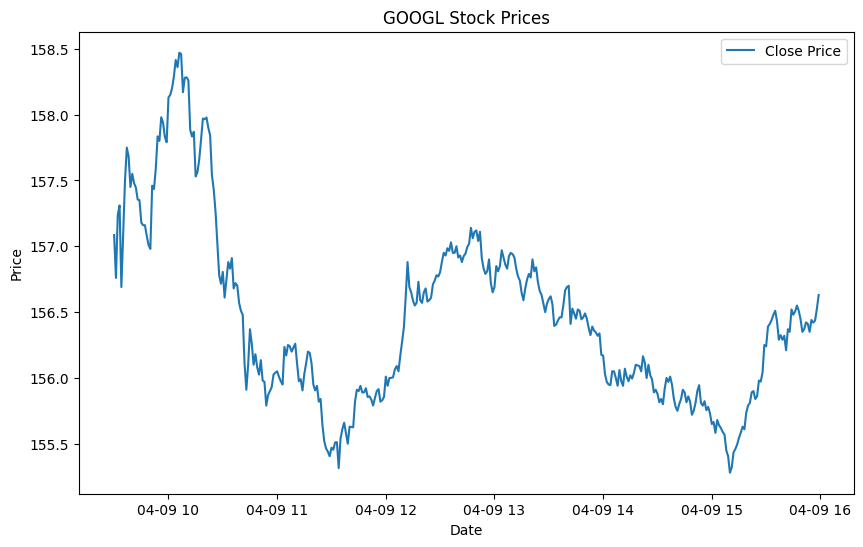

Epoch 1/10
9/9 - 3s - loss: 0.0372 - val_loss: 0.0080 - 3s/epoch - 355ms/step
Epoch 2/10
9/9 - 0s - loss: 0.0142 - val_loss: 9.4451e-04 - 67ms/epoch - 7ms/step
Epoch 3/10
9/9 - 0s - loss: 0.0129 - val_loss: 0.0036 - 64ms/epoch - 7ms/step
Epoch 4/10
9/9 - 0s - loss: 0.0094 - val_loss: 9.9819e-04 - 64ms/epoch - 7ms/step
Epoch 5/10
Restoring model weights from the end of the best epoch: 2.
9/9 - 0s - loss: 0.0097 - val_loss: 0.0014 - 68ms/epoch - 8ms/step
Epoch 5: early stopping
3/3 [==============================] - 1s 2ms/step


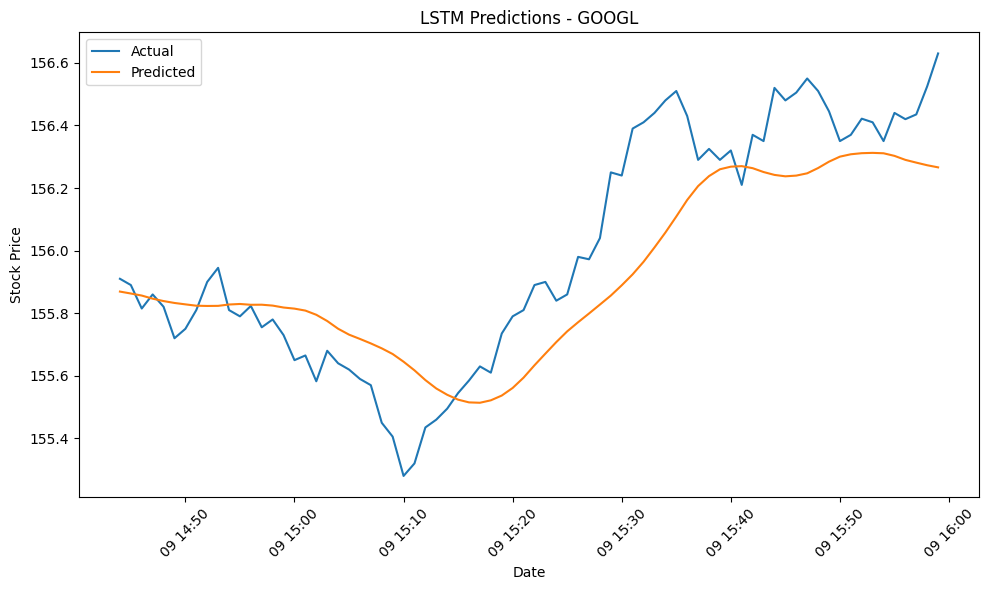

Evaluating LSTM Performance for GOOGL
Mean Squared Error (MSE): 0.03999869557293622
Root Mean Squared Error (RMSE): 0.1999967389057537
Mean Absolute Error (MAE): 0.16084570633737663
R^2 Score: 0.7127688122639111


[*********************100%%**********************]  1 of 1 completed


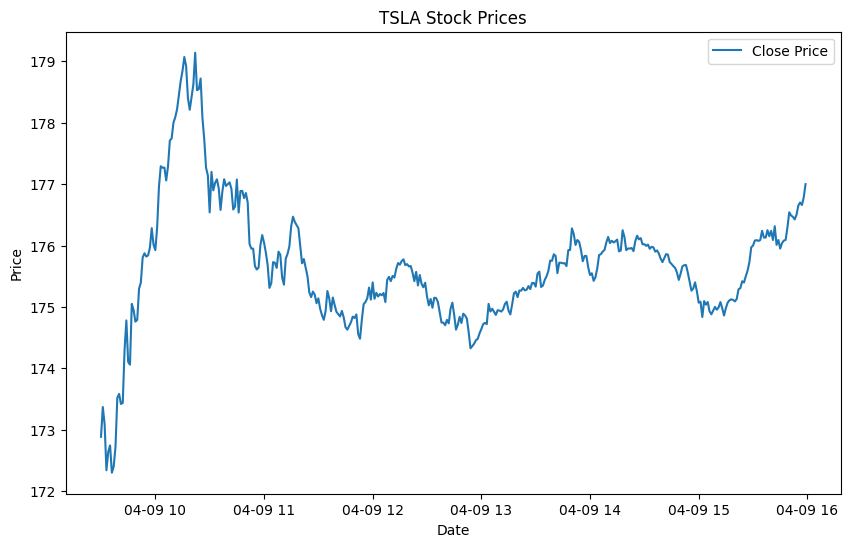

Epoch 1/10
9/9 - 3s - loss: 0.1602 - val_loss: 0.0072 - 3s/epoch - 368ms/step
Epoch 2/10
9/9 - 0s - loss: 0.0324 - val_loss: 0.0018 - 65ms/epoch - 7ms/step
Epoch 3/10
9/9 - 0s - loss: 0.0113 - val_loss: 0.0089 - 66ms/epoch - 7ms/step
Epoch 4/10
9/9 - 0s - loss: 0.0117 - val_loss: 2.4757e-04 - 66ms/epoch - 7ms/step
Epoch 5/10
9/9 - 0s - loss: 0.0092 - val_loss: 8.5176e-04 - 66ms/epoch - 7ms/step
Epoch 6/10
9/9 - 0s - loss: 0.0073 - val_loss: 4.2276e-04 - 65ms/epoch - 7ms/step
Epoch 7/10
Restoring model weights from the end of the best epoch: 4.
9/9 - 0s - loss: 0.0079 - val_loss: 5.0237e-04 - 68ms/epoch - 8ms/step
Epoch 7: early stopping
3/3 [==============================] - 1s 2ms/step


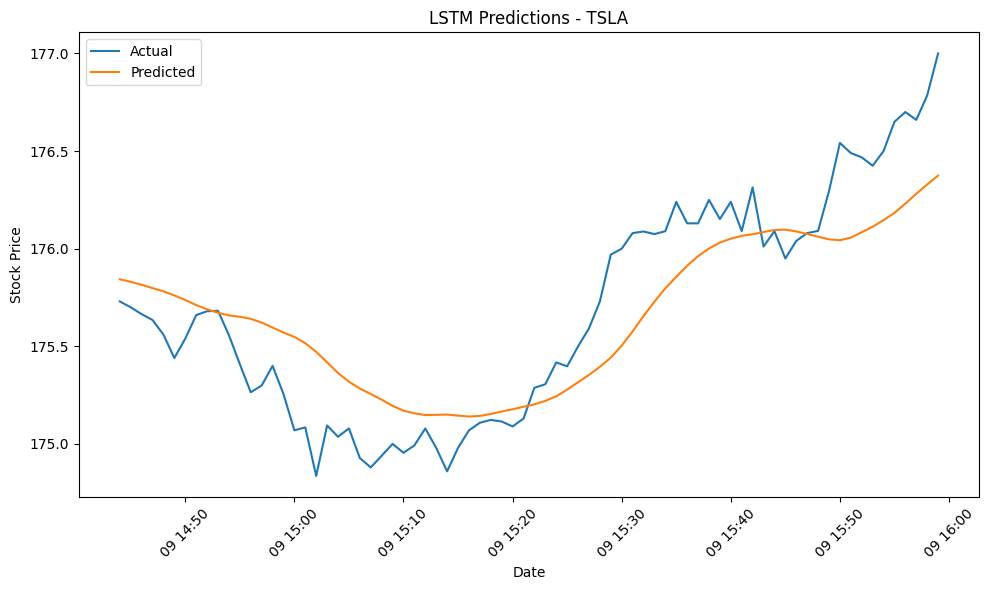

Evaluating LSTM Performance for TSLA
Mean Squared Error (MSE): 0.0834405294889094
Root Mean Squared Error (RMSE): 0.2888607441119499
Mean Absolute Error (MAE): 0.24109167801706413
R^2 Score: 0.7393447757754235


[*********************100%%**********************]  1 of 1 completed


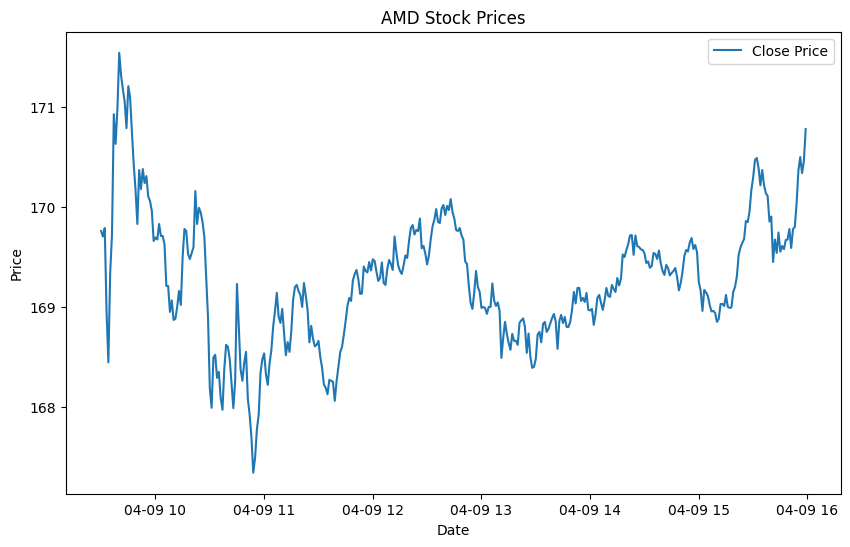

Epoch 1/10
9/9 - 3s - loss: 0.0799 - val_loss: 0.0212 - 3s/epoch - 342ms/step
Epoch 2/10
9/9 - 0s - loss: 0.0245 - val_loss: 0.0120 - 67ms/epoch - 7ms/step
Epoch 3/10
9/9 - 0s - loss: 0.0164 - val_loss: 0.0039 - 70ms/epoch - 8ms/step
Epoch 4/10
9/9 - 0s - loss: 0.0142 - val_loss: 0.0015 - 65ms/epoch - 7ms/step
Epoch 5/10
9/9 - 0s - loss: 0.0127 - val_loss: 0.0046 - 66ms/epoch - 7ms/step
Epoch 6/10
9/9 - 0s - loss: 0.0118 - val_loss: 0.0022 - 64ms/epoch - 7ms/step
Epoch 7/10
Restoring model weights from the end of the best epoch: 4.
9/9 - 0s - loss: 0.0120 - val_loss: 0.0020 - 68ms/epoch - 8ms/step
Epoch 7: early stopping
3/3 [==============================] - 1s 3ms/step


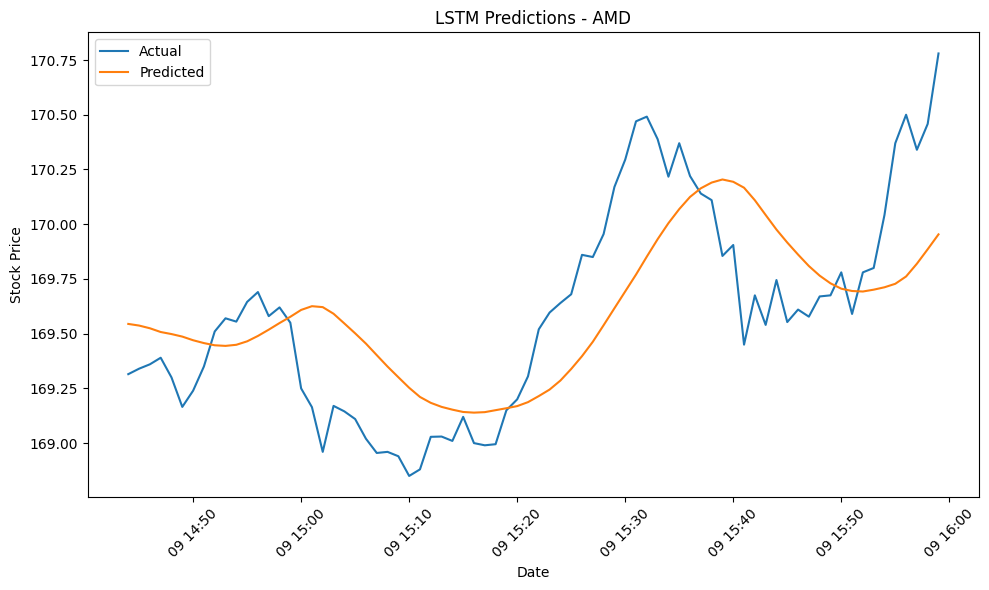

Evaluating LSTM Performance for AMD
Mean Squared Error (MSE): 0.1262174502787125
Root Mean Squared Error (RMSE): 0.3552709533281781
Mean Absolute Error (MAE): 0.29369996723375597
R^2 Score: 0.44610657151303845


In [8]:
for symbol in symbols:
    stock_data, dates = get_stock_data(symbol, start_date='2024-04-09', end_date='2024-04-10', interval='1m')
    
    # Normalize the data
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(stock_data)
    
    close_scaler = MinMaxScaler()
    close_prices_scaled = close_scaler.fit_transform(stock_data[['Close']])
    
    # Create sequences with all features but target the scaled Close prices
    X, y = create_sequences(data_scaled, close_prices_scaled.flatten(), sequence_length)
    
    # Split the data into training and testing sets
    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    
    # Build the LSTM model with dropout for regularization
    lstm_model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(sequence_length, data_scaled.shape[1])),
        Dropout(0.2),
        LSTM(units=50),
        Dropout(0.2),
        Dense(1)
    ])
    lstm_model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Define EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

    # Train the LSTM model
    lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=2, callbacks=[early_stopping])
    
    # Predict on the test set with the LSTM model
    predictions_scaled_lstm = lstm_model.predict(X_test)
    
    # Inverse transform the predictions
    predictions_lstm = close_scaler.inverse_transform(predictions_scaled_lstm)
    y_test_original = close_scaler.inverse_transform(y_test.reshape(-1, 1))

    prediction_dates = dates[split_index + sequence_length:][:len(predictions_lstm)]

    # Plot the predictions
    plot_predictions_with_dates(prediction_dates, y_test_original, predictions_lstm, f'LSTM Predictions - {symbol}')

    
    # Evaluate LSTM model performance with additional metrics
    print(f'Evaluating LSTM Performance for {symbol}')
    evaluate_model_performance(y_test_original, predictions_lstm)